Here we will cover the end to end execution of a machine learning project with a real dataset. We will cover all the phases which are part of a complete machine learning project and go deep in each of these flows.


    Data Wrangling
    EDA
    Feature engineering and Feature selection
    Compare different models
    Hyperparameter tuning
    Evaluate models
    Interpret the model results
    Draw conclusions and document work

# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# Set default font size
plt.rcParams['font.size'] = 24


# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)



# Data Load and examine

Ok so the fuel for any ML project is data. We will use New york city public energy data type. This is a labeled dataset which provide the **Energy Star Score** for the building based on the features given in the dataset. data is available at http://www.nyc.gov/html/gbee/html/plan/ll84_scores.shtml. I am using 2017 data for this model.

So we know that Energy Star Score is a continuous variable (1- 100) so it will be a regression problem. so we will use the appropriate algorithm to solve our problem..

In [2]:
# Read in data into a dataframe 
data = pd.read_csv('data/nyc_energy_2017.csv',encoding = "ISO-8859-1")

# Display top of dataframe
data.head()



,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft?),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft?),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft?),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft?),Weather Normalized Site EUI (kBtu/ft?),Weather Normalized Site Electricity Intensity (kWh/ft?),Weather Normalized Site Natural Gas Intensity (therms/ft?),Weather Normalized Source EUI (kBtu/ft?),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft?),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft?),Source EUI (kBtu/ft?),Release Date,Water Required?,DOF Benchmarking Submission Status
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,51550675.1,Not Available,Not Available,38139374.2,11082770.5,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,5/1/2017 17:32,No,In Compliance
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,19624847.2,Not Available,Not Available,Not Available,-391414802.6,933073441,9330734.4,332365924,96261312.1,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,4/27/2017 11:23,No,In Compliance
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,4/27/2017 11:23,No,In Compliance
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),1305748,Not Available,Not Available,Not Available,Not Available,1971,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Availab

In [3]:
data.shape

(11746, 54)

So we can see that there are 11746 rows in the data and number of columns is 54. Now we can not pass all the columns into the algorithms as most of them are not relevant or are very less relevant to calculate the star rating. Extra columns increase the compute time and also effect the performance of the algorithms.

Most of the time the Domain expert can help to decide which are the important features but if its not possible to get a domain expert, a data scientist can also work on data to examine important features. There are many tools and techniques available for the same.

# Data Wrangling
Before passing the data to machine learning algorithm we need to check the missing values, outliers, data column formating, etc. Real world data is messy so all these steps are very important. let us first check the data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 54 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11746 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

### Convert "Not Available" to null

So this shows that there are very few missing values in the data. But actually its not true as instead of null value text "Not Available" is used in most column. So though its showing very less null values in columns but in real they are very high. So first convert all "Not Available" to null values

In [5]:
data = data.replace({'Not Available': np.nan})

### Handle missing values


In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
missing_values_table(data)

Your selected dataframe has 54 columns.
There are 39 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type,10262,87.4
3rd Largest Property Use Type - Gross Floor Area (ft?),10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


So we have alist of all the columns and respective null values. To treat Null values either we can impute them or remove the respective column or rows. Generally if null values in a column are less we can replace them by some critaria but if there are lot of null values its good to remove the entire column as imputing will not be a good solutino in that case.

So we will drop those columns which have more than 50% of missing values.

In [8]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 54 columns.
There are 39 columns that have missing values.
We will remove 11 columns.


In [9]:
# Drop the columns
data = data.drop(list(missing_columns), axis = 1)
data.shape


(11746, 43)

So out of 54, 11 columns have been dropped. Though there are some more columns with missing values in the dataset, but we will impute the missing values later

### Handling wrong data types
Another issue we say here that there are many columns whose datatype is shown as object but it should be either integer or float to be passed to the algorithms as algorithms can not work on string or object types for numerical computation. We can not blindly convert all columns to float type but columns that probably should have numeric values (such as square feet or energy usage) into numeric datatypes.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 43 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11746 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11735 non-null object
NYC Building Identification Number (BIN)                      11584 non-null object
Address 1 (self-reported)                                     11746 non-null object
Postal Code                                                   11746 non-null object
Street Number                                        

In [11]:
# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft?' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 43 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11746 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11735 non-null object
NYC Building Identification Number (BIN)                      11584 non-null object
Address 1 (self-reported)                                     11746 non-null object
Postal Code                                                   11746 non-null object
Street Number                                        

so now almost every column involved in numeric computaion is converted into either float or int. let us see the distribution of our data

In [13]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft?),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft?),Weather Normalized Site EUI (kBtu/ft?),Weather Normalized Site Electricity Intensity (kWh/ft?),Weather Normalized Site Natural Gas Intensity (therms/ft?),Weather Normalized Source EUI (kBtu/ft?),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft?),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft?),Source EUI (kBtu/ft?)
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,5.045777e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,3.911931e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.098251e+06,1.176952e+04,1.043673e+06,3.019974e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,6.855070e+06,7.348107e+04,4.370302e+06,1.284677e+06,9.084250e+02,4.475000e+02,4.249000e+02,1.584140e+05,8.031875e+03,70.805000,162.750000
max,14993.000000,5.991312e+06,1.354011e+07,1.421712e+07,2019.000000,161.000000,100.000000,100.000000,869265.000000,939329.000000,6259.400000,9393.000000,986366.000000,3.940000e+11,3.942852e+09,1.691763e+09,4.958273e+08,2.094340e+07,2.094340e+07,4.764375e+06,1.421712e+07,6.594604e+06,96305.690000,912801.100000


# Exploratory Data Analysis
Here we will try to get some more characteristics of this data which define it. We will find trends, anomalies, patterns and relationship with in data.

In EDA we start from getting a larger picture of our data and then come down to specidic feature of sub-set which give some interesting information. EDA help us to decide which class of algorithm to use and which features to be used for prediction.

To begin the EDA, we will focus on a single variable, the Energy Star Score, because this is the target for our machine learning models

## Single Variable plot

Single variable plot or univariate plot shows the distribution of a single variable

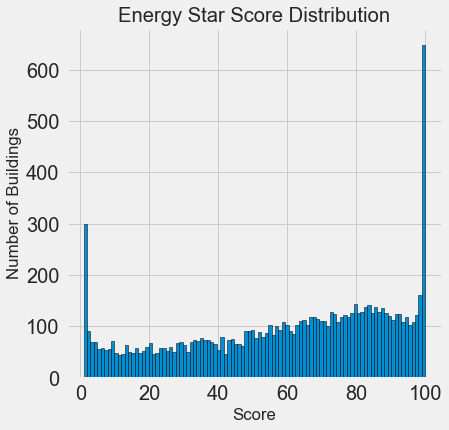

In [16]:
from IPython.core.pylabtools import figsize
figsize(6, 6)

# Rename the score 
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins = 100, edgecolor = 'k');
plt.xlabel('Score'); plt.ylabel('Number of Buildings'); 
plt.title('Energy Star Score Distribution');

Our first plot has already revealed some surprising (and suspicious) information! As the Energy Star Score is a percentile rank, we would expect to see a completely flat distribution with each score making up 1% of the distribution (about 90 buildings). However, this is definitely not the case as we can see that the two most common scores, 1 and 100, make up a disproporationate number of the overall scores.

To contrast the Energy Star Score, we can look at the Energy Use Intensity (EUI), which is the total energy use divided by the square footage of the building. Here the energy usage is not self-reported, so this could be a more objective measure of the energy efficiency of a building. Moreover, this is not a percentile rank, so the absolute values are important and we would expect them to be approximately normally distributed with perhaps a few outliers on the low or high end.

### Outlier detection and removal

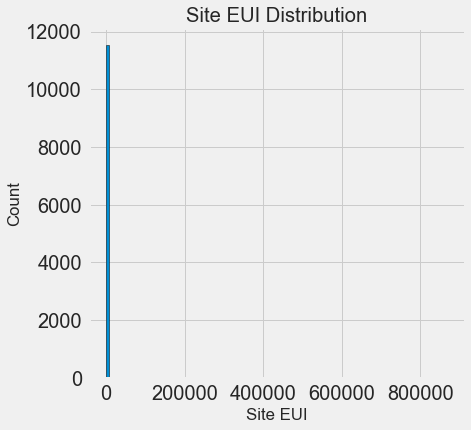

In [17]:
# Histogram Plot of Site EUI
figsize(6, 6)
plt.hist(data['Site EUI (kBtu/ft?)'].dropna(), bins = 100, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

So here we see another problem that Site EUI distribution have some outliers. Most of the values are below 100000 but there are one or two values which goes upto 800000 (Though not visible on graph as very few in number). so let us investigate it.

In [18]:

data['Site EUI (kBtu/ft?)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft?), dtype: float64

so we can sea that meas in 280 and sd is 8607 but there are values of 869265 also. which are clear outliers. so need to remove them.

In [19]:
data['Site EUI (kBtu/ft?)'].dropna().sort_values().tail(10)

3157     51328.8
3154     51831.2
3365     78360.1
8254     84969.6
3245     95560.2
8253    103562.7
8158    112173.6
3880    126307.4
7       143974.4
8053    869265.0
Name: Site EUI (kBtu/ft?), dtype: float64

we can see that last value (869265) is real outlier so we need to remove it.

In [20]:
data.loc[data['Site EUI (kBtu/ft?)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft?),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),score,Site EUI (kBtu/ft?),Weather Normalized Site EUI (kBtu/ft?),Weather Normalized Site Electricity Intensity (kWh/ft?),Weather Normalized Site Natural Gas Intensity (therms/ft?),Weather Normalized Source EUI (kBtu/ft?),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft?),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft?),Source EUI (kBtu/ft?),Release Date,Water Required?,DOF Benchmarking Submission Status
8053,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,5/1/2017 23:34,NaN,In Compliance


When we remove outliers, we want to be careful that we are not throwing away measurements just because they look strange. They may be the result of actual phenomenon that we should further investigate. When removing outliers, I try to be as conservative as possible, using the definition of an extreme outlier:


On the low end, an extreme outlier is below  $\text{First Quartile} -3 * \text{Interquartile Range}$

On the high end, an extreme outlier is above $\text{Third Quartile} + 3 * \text{Interquartile Range}$

In this case, I will only remove the single outlying point and see how the distribution looks.

In [21]:
# Calculate first and third quartile
first_quartile = data['Site EUI (kBtu/ft?)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft?)'].describe()['75%']

# Interquartile range
iqr = third_quartile - first_quartile

# Remove outliers
data = data[(data['Site EUI (kBtu/ft?)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft?)'] < (third_quartile + 3 * iqr))]

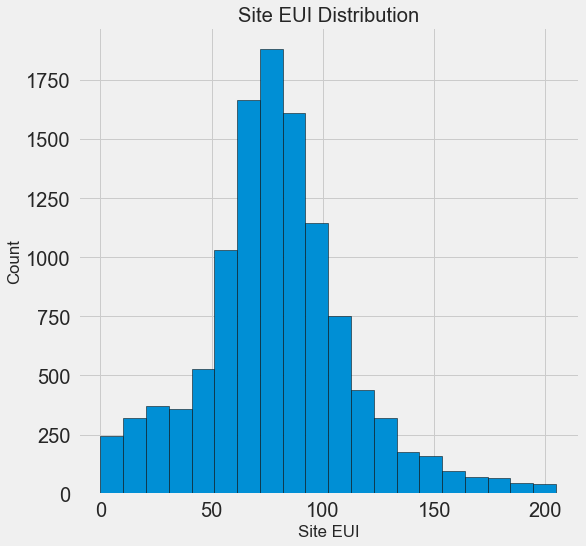

In [22]:
# Histogram Plot of Site EUI
figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft?)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

This plot looks a little less suspicious and is close to normally distributed with a long tail on the right side (it has a positive skew).

### Looking for Relationships
In order to look at the effect of categorical variables on the score, we can make a density plot colored by the value of the categorical variable. Density plots also show the distribution of a single variable and can be thought of as a smoothed histogram. If we color the density curves by a categorical variable, this will shows us how the distribution changes based on the class.

The first plot we will make shows the distribution of scores by the property type. In order to not clutter the plot, we will limit the graph to building types that have more than 100 observations in the dataset.

In [23]:
# Create a list of buildings with more than 100 measurements
types = data.dropna(subset=['score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

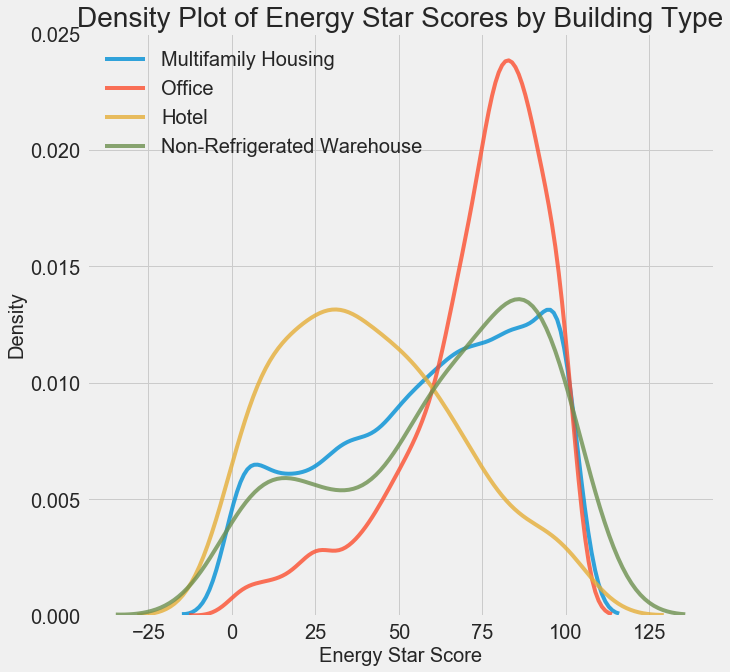

In [24]:
# Plot of distribution of scores for building categories
figsize(10, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

From this graph, we can see that the building type does have an effect on the score (the negative scores on the graph are an artifact of the kernel density estimation procedure). While I was initially going to focus on the numerical columns for predicting the score, this graph tells us that we should include the property type because this information can be useful for determining the score. As building type is a categorical variable, it will have to be one-hot encoded before we can feed it into a machine learning model.

To examine another categorical variable, borough, we can make the same graph, but this time colored by the borough.

In [25]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)

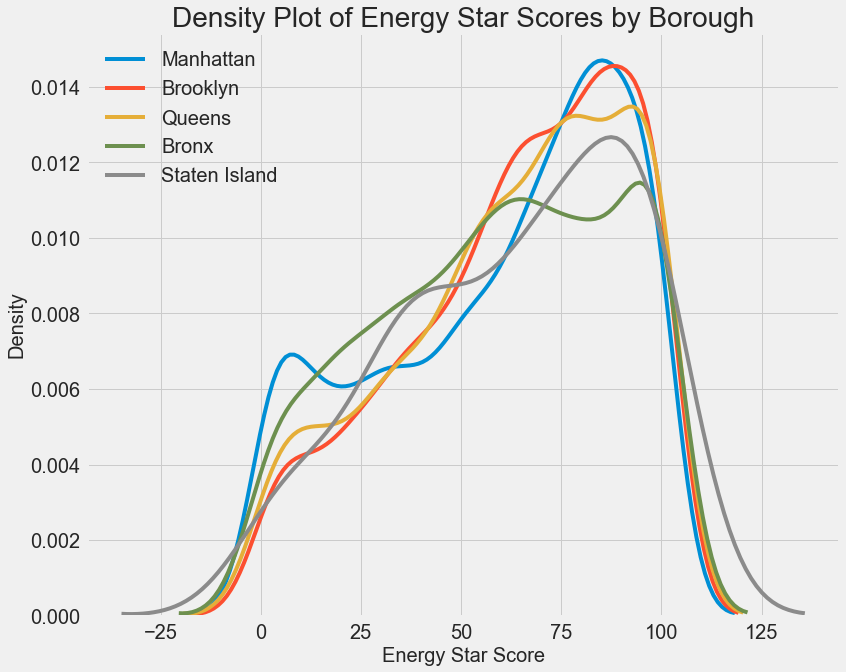

In [26]:
# Plot of distribution of scores for boroughs
figsize(12, 10)

# Plot each borough distribution of scores
for borough in boroughs:
    # Select the building type
    subset = data[data['Borough'] == borough]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['score'].dropna(),
               label = borough);
    
# label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Borough', size = 28);

The borough of the building does not seem to make as significant a difference in the distribution of the score as does the building type. Nonetheless, it might make sense to include the borough as a categorical variable.

### Finding correlation
n order to quantify correlations between the features (variables) and the target, we can calculate the Pearson correlation coefficient. This is a measure of the strength and direction of a linear relationship between two variables: a value of -1 means the two variables are perfectly negatively linearly correlated and a value of +1 means the two variables are perfectly positively linearly correlated. The figure below shows different values of the correlation coeffient and how they appear graphically.

<img src="correlation.png">

Although there can be non-linear relationships between the features and targets and correlation coefficients do not account for interactions between features, linear relationships are a good way to start exploring trends in the data. We can then use these values for selecting the features to employ in our model.

The code below calculates the correlation coefficients between all the variables and the score.

In [27]:
# Find all correlations and sort 
correlations_data = data.corr()['score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft?)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft?)                       -0.713993
Weather Normalized Source EUI (kBtu/ft?)                     -0.645542
Source EUI (kBtu/ft?)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft?)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft?)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Property Id                                                  -0.046605
Indire

There are several strong negative correlations between the features and the target. The most negative correlations with the score are the different categories of Energy Use Intensity (EUI), Site EUI (kBtu/ft²) and  Weather Normalized Site EUI (kBtu/ft²) (these vary slightly in how they are calculated). The EUI is the amount of energy used by a building divided by the square footage of the buildings and is meant to be a measure of the efficiency of a building with a lower score being better. Intuitively, these correlations then make sense: as the EUI increases, the Energy Star Score tends to decrease.

To account for possible non-linear relationships, we can take square root and natural log transformations of the features and then calculate the correlation coefficients with the score. To try and capture any possible relationships between the borough or building type (remember these are categorical variables) and the score we will have to one-hot encode these columns.

### Feature engineering and one hot encoding

In the following code, we take log and square root transformations of the numerical variables, one-hot encode the two selected categorical variables (building type and borough), calculate the correlations between all of the features and the score, and display the top 15 most positive and top 15 most negative correlations. This is a lot, but with pandas, it is straightforward to do each step!

In [28]:
# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['score'])

# Find correlations with the score 
correlations = features.corr()['score'].dropna().sort_values()

D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # T

In [29]:
# Display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft?)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft?)                         -0.713993
sqrt_Site EUI (kBtu/ft?)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft?)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft?)                  -0.671044
sqrt_Source EUI (kBtu/ft?)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft?)                       -0.645542
Source EUI (kBtu/ft?)                                          -0.641037
log_Source EUI (kBtu/ft?)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft?)                   -0.620329
log_Site EUI (kBtu/ft?)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft?)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft?)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [30]:
# Display most positive correlations
correlations.tail(15)

Largest Property Use Type - Gross Floor Area (ft?)                 0.018330
sqrt_Property GFA - Self-Reported (ft?)                            0.018976
sqrt_Largest Property Use Type - Gross Floor Area (ft?)            0.021893
log_Property GFA - Self-Reported (ft?)                             0.022711
Largest Property Use Type_Retail Store                             0.025007
log_Largest Property Use Type - Gross Floor Area (ft?)             0.027315
sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
Largest Prop

After transforming the features, the strongest relationships are still those related to Energy Use Intensity (EUI). The log and square root transformations do not seem the have resulted in any stronger relationships. There are no strong positive linear relationships although we do see that a building type of office (Largest Property Use Type_Office) is slightly positively correlated with the score. This variable is a one-hot encoded representation of the categorical variables for building type.

We can use these correlations in order to perform feature selection (coming up in a little bit). Right now, let's graph the most significant correlation (in terms of absolute value) in the dataset which is Site EUI (kBtu/ft^2). We can color the graph by the building type to show how that affects the relationship.

### Two-Variable Plots
In order to visualize the relationship between two variables, we use a scatterplot. We can also include additional variables using aspects such as color of the markers or size of the markers. Here we will plot two numeric variables against one another and use color to represent a third categorical variable.

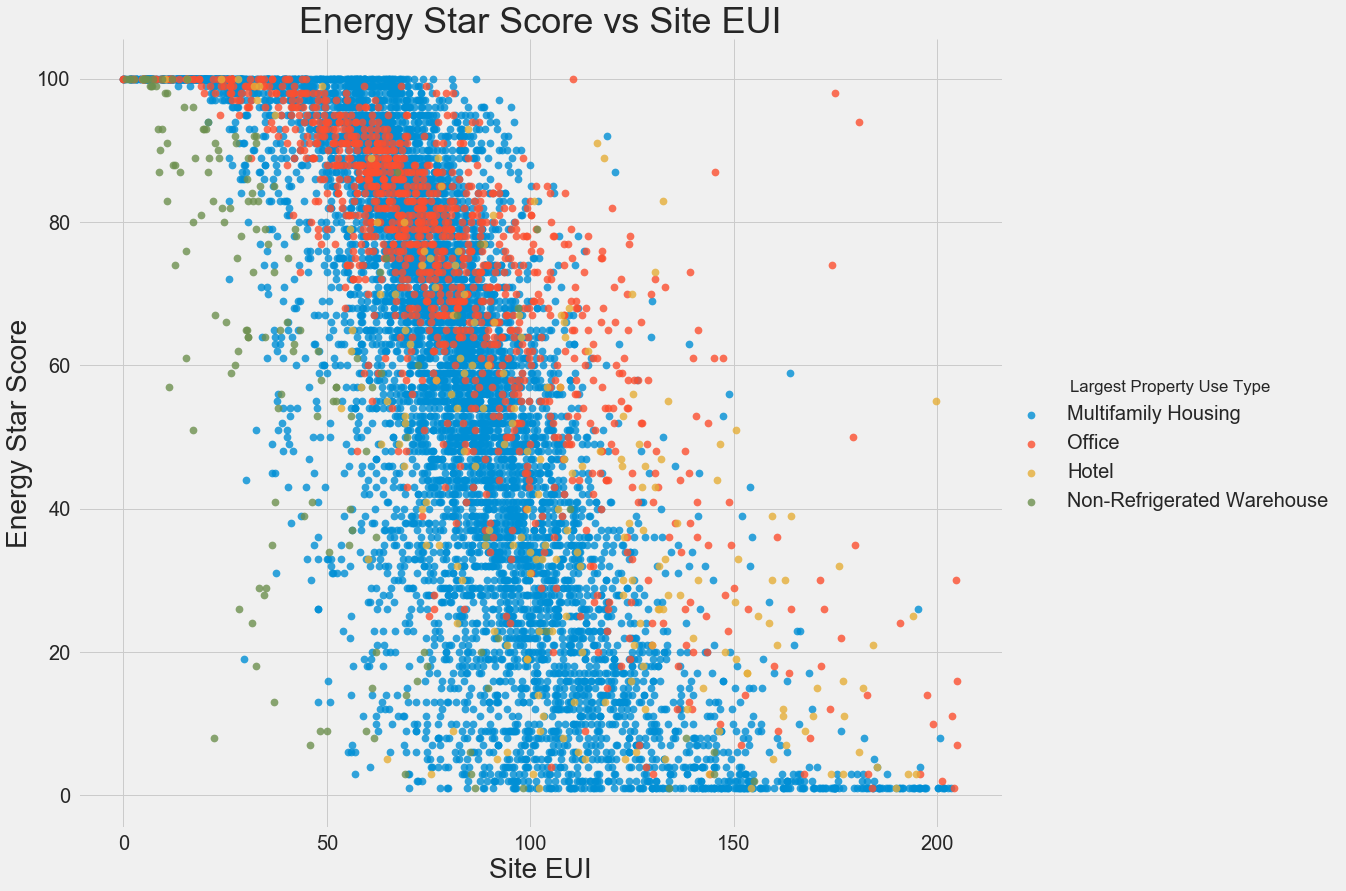

In [31]:
figsize(12, 10)

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft?)', 'score', 
          hue = 'Largest Property Use Type', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);


There is a clear negative relationship between the Site EUI and the score. The relationship is not perfectly linear (it looks with a correlation coefficient of -0.7, but it does look like this feature will be important for predicting the score of a building.

### Pairs Plot
As a final exercise for exploratory data analysis, we can make a pairs plot between several different variables. The Pairs Plot is a great way to examine many variables at once as it shows scatterplots between pairs of variables and histograms of single variables on the diagonal.

Using the seaborn PairGrid function, we can map different plots on to the three aspects of the grid. The upper triangle will have scatterplots, the diagonal will show histograms, and the lower triangle will show both the correlation coefficient between two variables and a 2-D kernel density estimate of the two variables.

D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\contour.py:960: Us

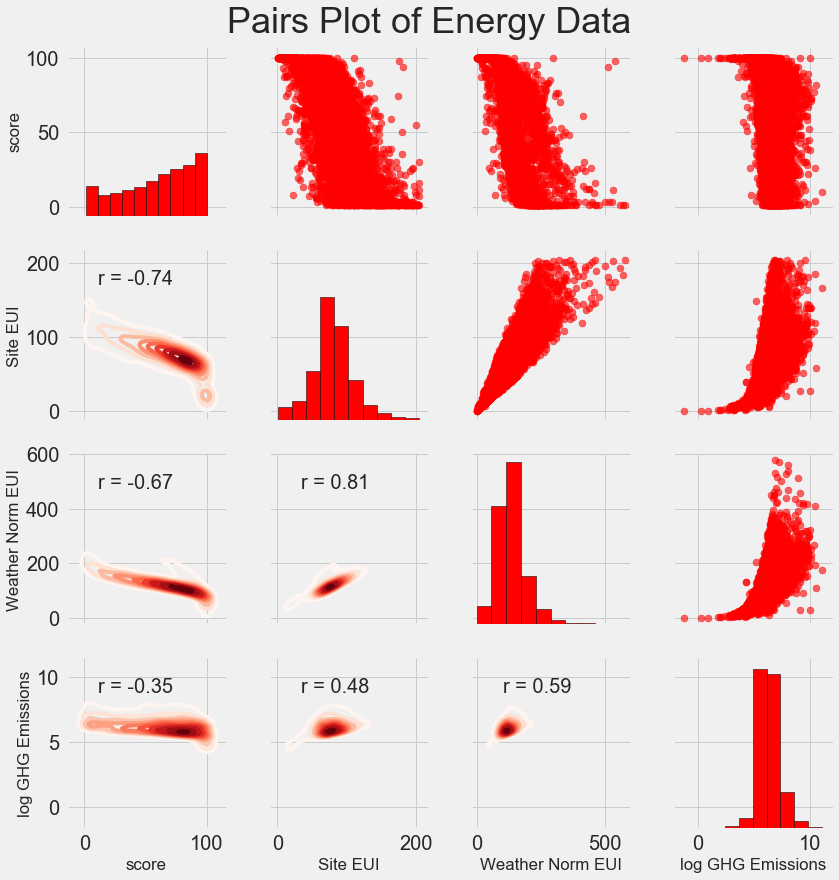

In [32]:
# Extract the columns to  plot
plot_data = features[['score', 'Site EUI (kBtu/ft?)', 
                      'Weather Normalized Source EUI (kBtu/ft?)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft?)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft?)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

To interpret the relationships in the plot, we can look for where the variables in one row intersect with the variables in one column. For example, to find the relationship between score and the log of GHG Emissions, we look at the score column and find the log GHG Emissions row. At the intersection (the lower left plot) we see that the score has a -0.35 correlation coefficient with this varible. If we look at the upper right plot, we can see a scatterplot of this relationship.

# Feature Engineering and Selection
Now that we have explored the trends and relationships within the data, we can work on engineering a set of features for our models. We can use the results of the EDA to inform this feature engineering. In particular, we learned the following from EDA which can help us in engineering/selecting features:

The score distribution varies by building type and to a lesser extent by borough. Although we will focus on numerical features, we should also include these two categorical features in the model.
Taking the log transformation of features does not result in significant increases in the linear correlations between features and the score
Before we get any further, we should define what feature engineering and selection are! These definitions are informal and have considerable overlap, but I like to think of them as two separate processes:

**Feature Engineering:** The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as we did with the log and square root, or one-hot encoding categorical variables so they can be used in a model. Generally, I think of feature engineering as adding additional features derived from the raw data.


**Feature Selection:** The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as subtracting features so we are left with only those that are most important.

Feature engineering and selection often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn!

In this project, we will take the following steps for feature engineering:

    -Select only the numerical variables and two categorical variables (borough and property use type)
    -Add in the log transformation of the numerical variables
    -One-hot encode the categorical variables
For feature selection, we will do the following:

    -Remove collinear features

We will discuss collinearity (also called multicollinearity) when we get to that process!

The following code selects the numeric features, adds in log transformations of all the numeric features, selects and one-hot encodes the categorical features, and joins the sets of features together.

In [33]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


(11319, 100)

At this point, we have 11319 observations (buildings) with 99 different features (one column is the score). Not all of these features are likely to be important for predicting the score, and several of these features are also redundant because they are highly correlated. We will deal with this second issue below.

## Remove Collinear Features
Highly collinear features have a significant correlation coefficent between them. For example, in our dataset, the Site EUI and Weather Norm EUI are highly correlated because they are just slightly different means of calculating the energy use intensity.

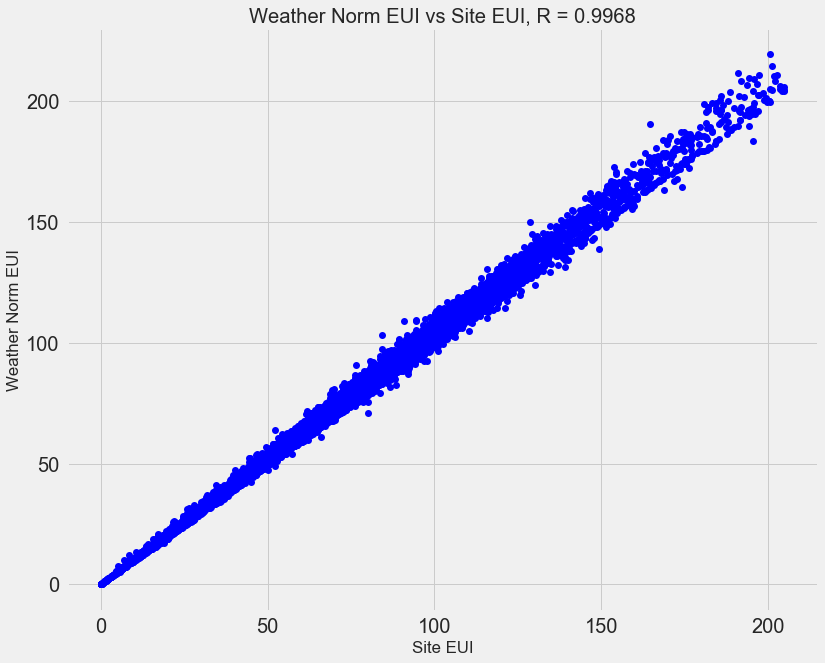

In [34]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft?)', 'Site EUI (kBtu/ft?)']].dropna()

plt.plot(plot_data['Site EUI (kBtu/ft?)'], plot_data['Weather Normalized Site EUI (kBtu/ft?)'], 'bo')
plt.xlabel('Site EUI'); plt.ylabel('Weather Norm EUI')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft?)', 'Site EUI (kBtu/ft?)']].dropna(), rowvar=False)[0][1]);

While variables in a dataset are usually correlated to a small degree, highly collinear variables can be redundant in the sense that we only need to retain one of the features to give our model the necessary information.

Removing collinear features is a method to reduce model complexity by decreasing the number of features and can help to increase model generalization. It can also help us to interpret the model because we only have to worry about a single variable, such as EUI, rather than how both EUI and weather normalized EUI affect the score.

There are a number of methods for removing collinear features, such as using the Variance Inflation Factor. We will use a simpler metric, and remove features that have a correlation coefficient above a certain threshold with each other (not with the score because we want variables that are highly correlated with the score!) For a more thorough discussion of removing collinear variables, check out this notebook on Kaggle.

The following code removes the collinear features based on a threshold we select for the correlation coefficients by removing one of the two features that are compared. It also prints the correlations that it removes so we can see the effect of adjusting the threshold. We will use a threshold of 0.6 which removes one of a pair of features if the correlation coefficient between the features exceeds this value.

In [35]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['score']
    x = x.drop(columns = ['score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []
    
    
    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft?)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft?)'])
    
    # Add the score back in to the data
    x['score'] = y
               
    return x

In [36]:
features = remove_collinear_features(features, 0.6);

D:\Users\703177402\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in greater_equal


In [37]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 63)

Our final dataset now has 64 features (one of the columns is the target). This is still quite a few, but mostly it is because we have one-hot encoded the categorical variables. Moreover, while a large number of features may be problematic for models such as linear regression, models such as the random forest perform implicit feature selection and automatically determine which features are important during traning. There are other feature selection steps to take, but for now we will keep all the features we have and see how the model performs.

**Additional Feature Selection**
There are plenty of more methods for feature selection. Some popular methods include principal components analysis (PCA) which transforms the features into a reduced number of dimensions that preserve the greatest variance, or independent components analysis (ICA) which aims to find the independent sources in a set of features. However, while these methods are effective at reducing the number of features, they create new features that have no physical meaning and hence make interpreting a model nearly impossible.

These methods are very helpful for dealing with high-dimensional data and I would suggest reading more on the topic if you plan on dealing with machine learning problems!

# Split Into Training and Testing Sets
In machine learning, we always need to separate our features into two sets:

- **Training set** which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.
- **Testing set**  which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world.

For our problem, we will first extract all the buildings without an Energy Star Score (we don't know the true answer for these buildings so they will not be helpful for training or testing). Then, we will split the buildings with an Energy Star Score into a testing set of 30% of the buildings, and a training set of 70% of the buildings.

Splitting the data into a random training and testing set is simple using scikit-learn. We can set the random state of the split to ensure consistent results.

In [39]:
# Extract the buildings with no score and the buildings with a score
no_score = features[features['score'].isna()]
score = features[features['score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 63)
(9461, 63)


In [41]:
# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# Separate out the features and targets
features = score.drop(columns='score')
targets = pd.DataFrame(score['score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(6622, 62)
(2839, 62)
(6622, 1)
(2839, 1)


We have 1858 buildings with no score, 6622 buildings with a score in the training set, and 2839 buildings with a score in the testing set. We have one final step to take in this notebook: determining a naive baseline for our models to beat!

# Establish a Baseline
It's important to establish a naive baseline before we beginning making machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem. This could be because we are not using the right models, because we need more data, or because there is a simpler solution that does not require machine learning. Establishing a baseline is crucial so we do not end up building a machine learning model only to realize we can't actually solve the problem.

For a regression task, a good naive baseline is to predict the median value of the target on the training set for all examples on the test set. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the medin value, then we will need to rethink our approach.

# Metric: Mean Absolute Error
There are a number of metrics used in machine learning tasks and it can be difficult to know which one to choose. Most of the time it will depend on the particular problem and if you have a specific goal to optimize for. I like Andrew Ng's advice to use a single real-value performance metric in order to compare models because it simplifies the evaluate process. Rather than calculating multiple metrics and trying to determine how important each one is, we should use a single number. In this case, because we doing regression, the mean absolute error is an appropriate metric. This is also interpretable because it represents the average amount our estimate if off by in the same units as the target value.

The function below calculates the mean absolute error between true values and predictions.

In [43]:

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [44]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 67.00
Baseline Performance on the test set: MAE = 25.0990


This shows our average estimate on the test set is off by about 25 points. The scores are between 1 and 100 so this means the average error from a naive method if about 25%. The naive method of guessing the median training value provides us a low baseline for our models to beat!

Conclusions
In this notebook, we carried out the first three steps of a machine learning problem:

    -Cleaned and formatted the raw data
    -Performed an exploratory data analysis
    -Developed a set of features to train our model using feature engineering and feature selection
    We also completed the crucial task of establishing a baseline metric so we can determine if our model is better than guessing!

Hopefully, you are starting to get a sense of how each part of the pipeline flows into the next: cleaning the data and getting it into the proper format allows us to perform an exploratory data analyis. The EDA then informs our decisions in the feature engineering and selection stage. These three steps generally are performed in this order, although we may come back later and do more EDA or feature engineering based on our modeling results. Data science is an iterative process in which we are always looking for ways to improve our previous work. This means we do not have to get things perfect the first time (although we can try our best) because there are almost always opportunities to revisit our decisions once we know more about the problem.

In part two, we will focus on implementing several machine learning methods, selecting the best model, and optimizing it for our problem using hyperparameter tuning with cross validation. As a final step here, we will save the datasets we developed to use again in the next part.

In [45]:
# Save the no scores, training, and testing data
no_score.to_csv('data/no_score.csv', index = False)
X.to_csv('data/training_features.csv', index = False)
X_test.to_csv('data/testing_features.csv', index = False)
y.to_csv('data/training_labels.csv', index = False)
y_test.to_csv('data/testing_labels.csv', index = False)